<a href="https://colab.research.google.com/github/anandtushar111/Linear-Regression/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Get Training Data**

In [0]:
dfx = pd.read_csv("/content/linearX.csv")
dfy = pd.read_csv("/content/linearY.csv")

In [0]:
x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

X = (x-x.mean())/x.std()
Y = y

(99, 1)
(99, 1)


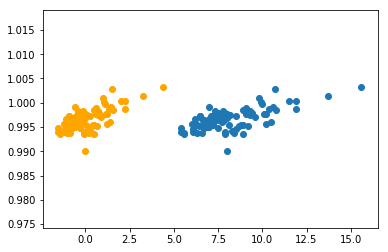

In [0]:
##Visualise

plt.scatter(X,Y,color='orange')
plt.scatter(x,y)
plt.show()

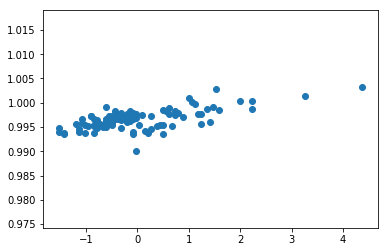

In [0]:

plt.scatter(X,Y)
plt.show()

##Gradient Descent Algorithm

- Start with random theta
- repeat until converge
    -update theta according to rule

In [0]:
def hypothesis(x, theta):
  return theta[0] + theta[1]*x

def error(X,Y,theta):
  m = X.shape[0]
  err = 0
  
  for i in range(m):
    err += (hypothesis(X[i], theta) - Y[i])**2
    
  return 0.5 * err

def gradient(X,Y,theta):
  
  grad = np.zeros((2,))
  m = X.shape[0]
  
  for i in range(m):
    hx = hypothesis(X[i], theta)
    grad[0] += hx - Y[i]
    grad[1] += (hx - Y[i])*X[i]
    
  return grad


#Algorithm
def gradientDescent(X,Y,learning_rate = 0.001):
  theta = np.array([-2.0,0])
  
  itr = 0
  max_itr = 100
  
  error_list = []
  theta_list = []
  
  #err = np.inf
  
  while(itr < max_itr):
    grad = gradient(X, Y, theta)
    err = error(X, Y, theta)
    error_list.append(err)
    theta_list.append((theta[0],theta[1]))
    theta[0] = theta[0] - learning_rate * grad[0]
    theta[1] = theta[1] - learning_rate * grad[1]
    
    itr += 1
    
  return theta, error_list, theta_list



  

In [0]:
final_theta, error_list, theta_list = gradientDescent(X,Y)

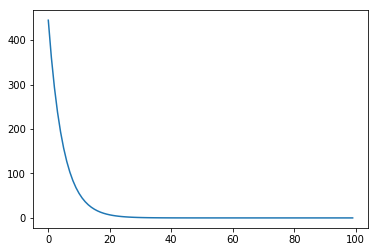

In [0]:
plt.plot(error_list)
plt.show()

In [0]:
print(final_theta)

[0.9965452 0.0013579]


In [0]:
#Plot the line for best fit

xtest = np.linspace(-2,6,10)
print(xtest)

#plt.scatter(X,Y)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


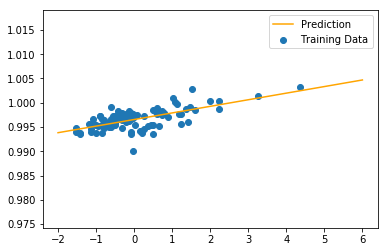

In [0]:
plt.scatter(X,Y, label ='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color = 'orange', label = 'Prediction')
plt.legend()
plt.show()

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)
T0, T1 = np.meshgrid(T0, T1)

J = np.zeros(T0.shape)

m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
  for j in range(n):
    J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)


In [0]:
theta_list = np.array(theta_list)

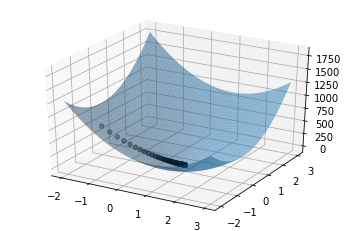

In [0]:
#Plot the 3D loss

fig = plt.figure()
axes = fig.gca(projection='3d')

axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')

axes.plot_surface(T0,T1,J,alpha=0.5)
plt.show()

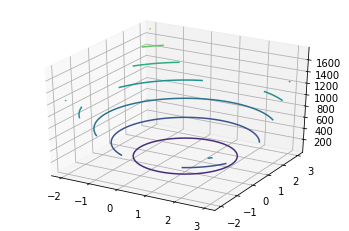

In [0]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.contour(T0,T1,J)
plt.show()